In [170]:
import requests
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import urllib.request
from selenium import webdriver
import pandas as pd
import csv
import time
import operator
import re
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(50)

In [53]:
#main sourcde url 
#construction accident -> search keyword
m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20191231&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20140702&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20100207&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20070626&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20040524&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20000605&query=%22construction%22%20accident&sort=newest&startDate=20000101"

In [54]:
session = requests.Session()
req=session.get(m_url) #default is s_url
soup = BeautifulSoup(req.text, 'html.parser')

#stream-panel > div.css-13mho3u > ol > li:nth-child(2) > div > div.css-1l4spti > a
#stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a


In [55]:

chrome_options = webdriver.ChromeOptions
#chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path='/Users/macbookpro/Project_construction/chromedriver')

link = []
driver.get(m_url)
time.sleep(3)
for i in range(110) :
    a = driver.page_source
    b = BeautifulSoup(a, 'html.parser')
    #stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a
    #stream-panel > div.css-13mho3u > ol > li > div > div.css-1l4spti > a
    #site-content > div > div:nth-child(2) > div.css-46b038 > ol > li:nth-child(1) > div > div > div > a
    c = b.select('#site-content > div >div>div> ol >li> div > div > div > a')
    
    for j in range(len(c)) :
        if c[j].attrs['href'] not in link :
            link.append(c[j].attrs['href'])
        else :
            pass
    
    driver.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/div/button').click()
    time.sleep(3)

#link

In [56]:
#link_source = link 
#a_link = link
#b_link = link
#c_link = link
#d_link = link
#e_link = link
#f_link = link
#print(len(f_link))
g_link = link
len(g_link)

1010

In [73]:
total_link = []
total_link.extend(g_link)
total_link.extend(b_link)
total_link.extend(c_link)
total_link.extend(d_link)
total_link.extend(e_link)
total_link.extend(f_link)


In [74]:
total_link
len(total_link)

5132

In [76]:
res = []
for a in total_link :
    if a not in res :
        res.append(a)


In [78]:
len(res)

5132

In [95]:
def removing_url(s_link):

    diff_link = []

#delete unsupported news 
    for i in range (len(s_link)) :
        #print(a_link[i])
        if s_link[i][1] != '2':
        
            diff_link.append(s_link[i])
            

    for j in range(len(diff_link)):
        if diff_link[j] in s_link:
            s_link.remove(diff_link[j])
        
    return s_link


In [110]:
new_f =removing_url(f_link)

In [119]:
print(len(total_link))
print("this is the number of unsupportive link " + str(len(diff_link)))

4565
this is the number of unsupportive link 567


In [86]:
## This is main source for analyzing article

class ArticleInfo():
    
    def __init__(self, s_url) :
        
        session = requests.Session()
        req=session.get(s_url)
        self.soup = BeautifulSoup(req.text, 'html.parser')
    
    
    def article_body(self) :
        body = self.soup.find('div', {'class' : 'StoryBodyCompanionColumn'})
        finalContent =''
    
        if body is not None :
            for itcontents in self.soup.findAll('p'):
                if itcontents == None :
                    continue
                content = itcontents.getText()
                content = re.sub(r"\n+", "", content)
                finalContent +=content
        else :
            return False
        
        return finalContent

    def article_title(self):
        titles = self.soup.select('title',{"data-rh":"true"})
        for title in titles:
            title = title.getText()
            break
        return title

    def article_date(self) :
  
        date = self.soup.find('li',{'class':'date'})
        if date != None :
            date = date.getText()
            
        else :
            date = self.soup.find('meta',{'name':'pdate'})
            if date !=None :
                date = date.get('content')
                if date !=None :
                    date = str(date)
                else:
                    none= "none"
                    datelist.append(none)
                
        return date

 

In [91]:
def scraping(source_link):
    titles =[]
    bodies =[]
    datelist=[]

    for s_url in source_link :
        s_url = 'https://www.nytimes.com'+s_url
        ob = ArticleInfo(s_url)
    
        body =ob.article_body()
        bodies.append(body)
    
        date = ob.article_date()
        datelist.append(date)
    
        title = ob.article_title()
        titles.append(title)
    return bodies, datelist, titles

In [111]:
#body, date, title = scraping(new_f)
#g_body = body
#g_date = date
#g_title = title

#b_body = body
#b_date = date
#b_title = title

#c_body = body
#c_date = date
#c_title = title

#d_body = body
#d_date = date
#d_title = title

#e_body = body
#e_date = date
#e_title = title

#f_body = body
#f_date = date
#f_title = title

In [ ]:
date_list = [g_date,b_date,c_date,d_date,e_date,f_date]
body_list = [g_body,b_body,c_body,d_body,e_body,f_body]
title_list = [g_title,b_title,c_title,d_title,e_title,f_title]
final_set = {}
final_set['date'] = []
final_set['title'] = []
final_set['body'] = []
for i in range(len(date_list)) :
    
    final_set['date'].extend(date_list[i])
    final_set['title'].extend(title_list[i])
    final_set['body'].extend(body_list[i])
    
df_nyt = pd.DataFrame(final_set, columns =["date", "title", "body"])

### Start Tokenize words with nltk

In [122]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.probability import ConditionalFreqDist
from gensim.models import Word2Vec
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [124]:
bodies = final_set['body']

In [404]:

#1. make lower case, regulazation
l_bodies=[]
for body in bodies :
    
    body = str(body).lower()
    l_bodies.append(body)

    
#2. removing stop words, tokenize
stop_words = set(stopwords.words('english'))

token_sentence = []
for words in l_bodies:
    word_tokens= word_tokenize(words)
    filter_sentence = [fw for fw in word_tokens if not fw in stop_words]
    
    for n in range(len(filter_sentence)) :
        if filter_sentence[n] == 'collapse' :
            filter_sentence[n]  = 'collapsed'
       
    ## fall + fell => fall (less frequency of fall just go with fell) , collapsed +collapse => collapse
    #filter_sentence = nltk.pos_tag(filter_sentence)
    token_sentence.append(filter_sentence)
    
#token_sentence
#print(l_bodies)

In [405]:
#check how many words I use 

len(token_sentence)
total_word_count = 0
for i in range(len(token_sentence)) :
    
    total_word_count += len(token_sentence[i])
print(total_word_count)
print(len(token_sentence))
print(len(l_bodies))

5090410
4565
4565


In [275]:
token_sentence[0]

['advertisementsupported',
 'bythe',
 'infractions',
 ',',
 'include',
 'dangling',
 'signs',
 'cracks',
 'walls',
 ',',
 'considered',
 'risky',
 'city',
 'said',
 'must',
 'fixed',
 'immediately.by',
 'azi',
 'paybarahafter',
 'pedestrian',
 'manhattan',
 'fatally',
 'struck',
 'piece',
 'building',
 'facade',
 ',',
 'officials',
 'month',
 'conducted',
 'surprise',
 'inspections',
 'determined',
 '220',
 'building',
 'city',
 'serious',
 'violations',
 'owners',
 'failed',
 'address',
 ',',
 'authorities',
 'said',
 'monday.the',
 'class',
 '1',
 'facade',
 'violations',
 '—',
 'include',
 'cracks',
 'facade',
 ',',
 'missing',
 'bricks',
 'loose',
 'masonry',
 '—',
 'considered',
 'dangerous',
 'posed',
 'threat',
 'public',
 'required',
 'building',
 'owner',
 'immediately',
 'put',
 'place',
 'protections',
 'pedestrians',
 ',',
 'spokeswoman',
 'city',
 '’',
 'department',
 'building',
 'said',
 '.',
 'inspection',
 'sweep',
 'came',
 'death',
 'month',
 'new',
 'york',
 'archit

In [406]:
final_set['body'] = token_sentence
df_nyt = pd.DataFrame(final_set, columns=["date","title","body"])
df_nyt.head()

,date,title,body
0,20191230,"After Death From Falling Debris, Violations Fo...","[advertisementsupported, bythe, infractions, ,..."
1,20191225,"For Trump Organization, Office Skyscrapers Mak...","[advertisementsupported, byoffice, towers, new..."
2,20191225,Traffic Circles Are Everywhere in France. Not ...,"[advertisementsupported, byfrance, dispatchtra..."
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,"[advertisementsupported, bynew, york, today, a..."
4,20191224,A Trump Policy ‘Clarification’ All but Ends Pu...,"[advertisementsupported, byby, lisa, friedmanw..."


### Basic Stats

frequency of keywords

In [288]:
from nltk.tokenize import sent_tokenize

In [566]:
#frequency of causation

cnt_fire =0 
cnt_fall =0
cnt_collapse =0 
cnt_crane = 0
cnt_explosion = 0
cnt_struck = 0
cnt_caught = 0
cnt_electrical = 0 



for token in token_sentence :
    if 'fire' in token :
        cnt_fire +=1
    if 'collapsed' in token :
        if 'fell' not in token :
            cnt_fall +=1
        #print(token)
    if 'fell' in token :
        cnt_fall +=1
        #print(token)
    if 'crane' in token :
        cnt_crane +=1
        #print(token)
    if 'explosion' in token :
        cnt_explosion +=1
    if 'struck' in token :
        cnt_struck +=1
    if 'caught' in token :
        cnt_caught +=1
        #print(token)
    if  'electrical'in token :
        cnt_electrical += 1
    if 'electrocution' in token :
        cnt_electrical += 1
    if 'electrocuted' in token :
        cnt_electrical +=1
        
#electrocution, electrical, electrocuted  = > electrocute

freq_dict = {}
freq_dict['fire'] = cnt_fire
freq_dict['fell'] = cnt_fall
#freq_dict['collapsed'] = cnt_collapse
freq_dict['crane'] = cnt_crane
freq_dict['explosion'] = cnt_explosion
freq_dict['struck'] = cnt_struck
freq_dict['caught'] = cnt_caught
freq_dict['electrical'] = cnt_electronical


print(freq_dict)

{'fire': 1045, 'fell': 1405, 'crane': 317, 'explosion': 327, 'struck': 566, 'caught': 399, 'electrical': 238}


{'fire': 1045, 'fell': 1405, 'crane': 317, 'explosion': 327, 'struck': 566, 'caught': 399, 'electrical': 238}
[('fell', 1405), ('fire', 1045), ('struck', 566), ('caught', 399), ('explosion', 327), ('crane', 317), ('electrical', 238)]


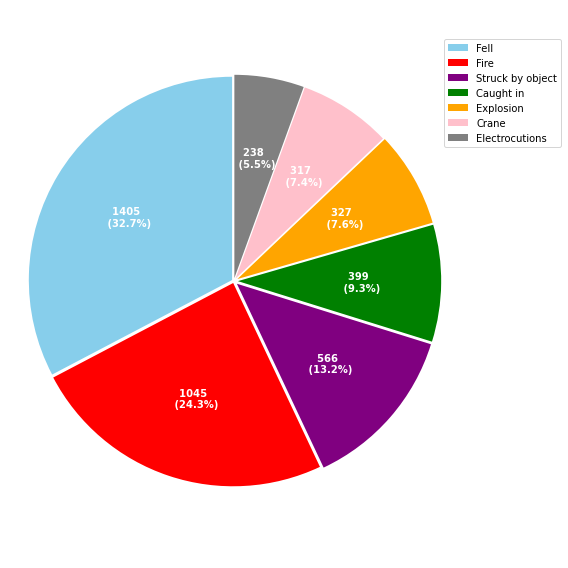

In [803]:
#frequency pie chart of five keywords

import matplotlib.pyplot as plt

print(freq_dict)

s_freq_dict = sorted(freq_dict.items(), key = lambda x:x[1], reverse = True)
print(s_freq_dict)
fig, ax = plt.subplots(figsize=(8,8))

value = []

for i in range(len(s_freq_dict)) :

    value.append(s_freq_dict[i][1])
    
keywords = ['Fell','Fire','Struck by object','Caught in','Explosion','Crane', 'Electrocutions']
colors = ['skyblue','red','purple','green','orange','pink','gray']    

def labeling(values):
    def autopct(pct) :
        all_val = sum(values)
        val = int(round(pct*all_val/100.0))
        return '{v:d} \n ({p:.1f}%)'.format(p=pct,v=val)
    return autopct

explode = [0.01,0.01,0.02,0.02,0.02,0.015,0.015]
_,_,autopcts = ax.pie(value,  autopct=labeling(value),explode = explode,colors =colors,  startangle = 90, textprops = dict(color='w') )

plt.setp(autopcts, **{'color':'white','weight':'bold', 'fontsize':10})


ax.axis('equal')

plt.legend(bbox_to_anchor=(0.95,0.95), loc='upper left', labels = keywords)
fig.tight_layout()
plt.savefig('figure/prediction/frequency_keyword_reason.jpeg',dpi=300)
#Frequency of accident type keywords

## frequency of day

In [570]:
#frequency of five keywords

cnt_mon =0 
cnt_tue =0
cnt_wed =0 
cnt_thr = 0
cnt_fri = 0
cnt_sat = 0
cnt_sun = 0

for token in token_sentence :
    if 'monday' in token :
        cnt_mon +=1
    if 'tuesday' in token :
        cnt_tue +=1
    if 'wednesday' in token :
        cnt_wed +=1
    if 'thursday' in token :
        cnt_thr +=1
    if 'friday' in token :
        cnt_fri +=1
    if 'saturday' in token :
        cnt_sat +=1
    if 'sunday' in token :
        cnt_sun +=1
        
        
freq_day_dict = {}
freq_day_dict['Mon'] = cnt_mon
freq_day_dict['Tue'] = cnt_tue
freq_day_dict['Wed'] = cnt_wed
freq_day_dict['Thu'] = cnt_thr
freq_day_dict['Fri'] = cnt_fri
freq_day_dict['Sat'] = cnt_sat
freq_day_dict['Sun'] = cnt_sun

print(freq_day_dict)


{'Mon': 616, 'Tue': 581, 'Wed': 549, 'Thu': 581, 'Fri': 672, 'Sat': 538, 'Sun': 636}


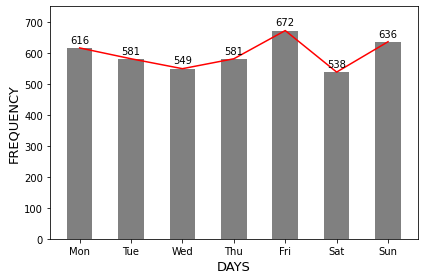

In [814]:
#frequency histogram of days keywords


fig, ax = plt.subplots()
rect = ax.bar(list(freq_day_dict.keys()),freq_day_dict.values(),width = 0.5, color ='gray')
ax.plot(list(freq_day_dict.keys()),list(freq_day_dict.values()), color = 'red')
ax.set_ylabel('FREQUENCY', fontsize = 13)
ax.set_xlabel('DAYS', fontsize =13)
ax.set_ylim(0,750)

autolabel(rect)


#plt.title("Frequency of days")
fig.tight_layout()
plt.savefig('figure/prediction/current/frequency_day.jpeg',dpi=300)

In [409]:
def generate_by_weather(df_article) :
    weather =[]
    month = []
    years = []
    if "weather" and "month" and "year" in df_article.columns:
        df_article = df_article.drop(["weather","month","year"], axis = 1)
    for i in range(len(df_article)) :
    
        if df_article.loc[i,'date'] is None :
            weather.append('None')
            month.append('None')
       
            years.append('None')
        else :
            
            year =df_article.loc[i,"date"][:4]
            years.append(year)
              
            if df_article.loc[i,"date"][4:6] == '03':
                weather.append('spring')
                month.append('march')
                
            elif df_article.loc[i,"date"][4:6] == '04' :
                weather.append('spring')
                month.append('april')
                
            elif df_article.loc[i,"date"][4:6] == '05' :
                weather.append('spring')
                month.append('may')
                
            elif df_article.loc[i,"date"][4:6] == "06" :
                weather.append('summer')
                month.append('june')
                
            elif df_article.loc[i,"date"][4:6] == "07" :
                weather.append('summer')
                month.append('july')
                
            elif df_article.loc[i,"date"][4:6] == "08" :
                weather.append('summer')
                month.append('august')
                
            elif df_article.loc[i,"date"][4:6] == "09" :
                weather.append('fall')
                month.append('september')
                
            elif df_article.loc[i,"date"][4:6] == "10" :
                weather.append('fall')
                month.append('october')
               
            elif df_article.loc[i,"date"][4:6] == "11" :
                weather.append('fall')
                month.append('november')
                
            elif df_article.loc[i,"date"][4:6] == "12" :
                weather.append('winter')
                month.append('december')
              
            elif df_article.loc[i,"date"][4:6] == "01" :
                weather.append('winter')
                month.append('january')
                
            elif df_article.loc[i,"date"][4:6] == "02" :
                weather.append('winter')
                month.append('february')
               
            else :
                weather.append('error')
                

    print(len(weather))
    print(len(years))
    
    
    df_article.insert(3, "weather", weather)
    df_article.insert(4, "month", month)
    df_article.insert(5,"year",years)
    
    return df_article

In [410]:
df_arrange = generate_by_weather(df_nyt)

df_arrange.head()


4565
4565


,date,title,body,weather,month,year
0,20191230,"After Death From Falling Debris, Violations Fo...","[advertisementsupported, bythe, infractions, ,...",winter,december,2019
1,20191225,"For Trump Organization, Office Skyscrapers Mak...","[advertisementsupported, byoffice, towers, new...",winter,december,2019
2,20191225,Traffic Circles Are Everywhere in France. Not ...,"[advertisementsupported, byfrance, dispatchtra...",winter,december,2019
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,"[advertisementsupported, bynew, york, today, a...",winter,december,2019
4,20191224,A Trump Policy ‘Clarification’ All but Ends Pu...,"[advertisementsupported, byby, lisa, friedmanw...",winter,december,2019


Distribution by year

In [429]:
def get_dist_year(df) :
    
    year_set ={}
    for i in range(len(df)) :
        current = df.loc[i,"year"]
        if current not in year_set :
            year_set[current] = 1
        else : 
            year_set[current] +=1
    
    return year_set
    
    

In [445]:
dist_year = get_dist_year(df_arrange)
sort_year = sorted(dist_year.items())
sort_year

o_year = [sets[0] for sets in sort_year]
o_freq = [sets[1] for sets in sort_year]
o_year,o_freq

(['2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  'None'],
 [224,
  265,
  231,
  223,
  291,
  228,
  476,
  307,
  375,
  200,
  185,
  194,
  152,
  173,
  164,
  195,
  164,
  151,
  167,
  155,
  45])

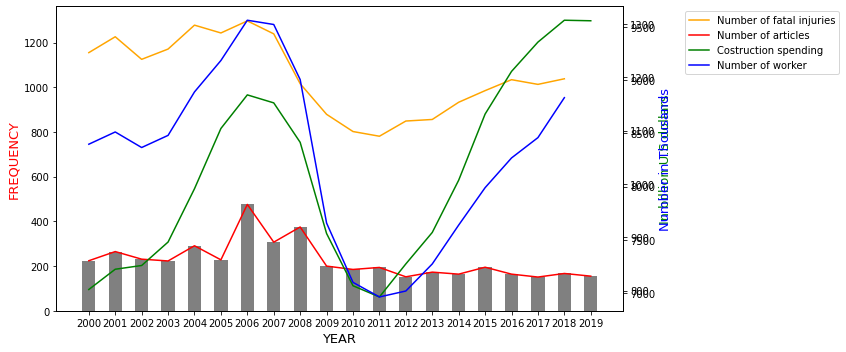

In [744]:
true_list = [1155,1226,1125,1171,1278,1243,1297,1239,1016,879,802,781,849,856,933,985,1034,1013,1038, None]

number_of_worker =[8397,8512,8366,8480,8888,9183,9561,9521,9004,7657,7100,6963,7019,7273,7638,7989,8268,8459,8834,None]

cs_spending = [802,840,847,891,991,1104,1167,1152,1078,907,809,788,850,909,1007,1131,1211,1266,1307,1306]

fig, ax = plt.subplots(figsize=(12,5))
rect1 = ax.bar(o_year[:-1],o_freq[:-1],width = 0.5, color ='gray')

ax.plot(o_year[:-1],true_list, color = "orange", label ="Number of fatal injuries")
ax.plot(o_year[:-1], o_freq[:-1], color ='red', label ='Number of articles')

#ax.plot(o_year[:-1], number_of_worker, color = "blue", label = 'Number of workers')

ax1 = ax.twinx()
ax2 = ax.twinx()
ax1.plot(o_year[:-1], cs_spending, color = 'green', label = 'Costruction spending')
ax2.plot(o_year[:-1], number_of_worker, color = 'blue', label = 'Number of worker')
ax1.set_ylabel("In billion U.S dollars", color = 'green', fontsize =13)
ax2.set_ylabel('Number in Thousands', color='blue', fontsize = 13)
ax.set_ylabel('FREQUENCY', color = 'red', fontsize = 13)
ax.set_xlabel('YEAR', fontsize = 13)


#ax.set_ylim(0,550)

#autolabel(rect1)        
        
#plt.title("Frequency of keywords")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
lines3, labels3 = ax2.get_legend_handles_labels()
ax1.legend(lines +lines2+lines3, labels+labels2+labels3,bbox_to_anchor=(1.1,1.0), loc = 'upper left' )

#plt.legend()
plt.xticks(o_year[:-1], rotation= 45)
fig.tight_layout()


#plt.savefig('Figure/prediction/year_distribution_comparison_ex1.png')

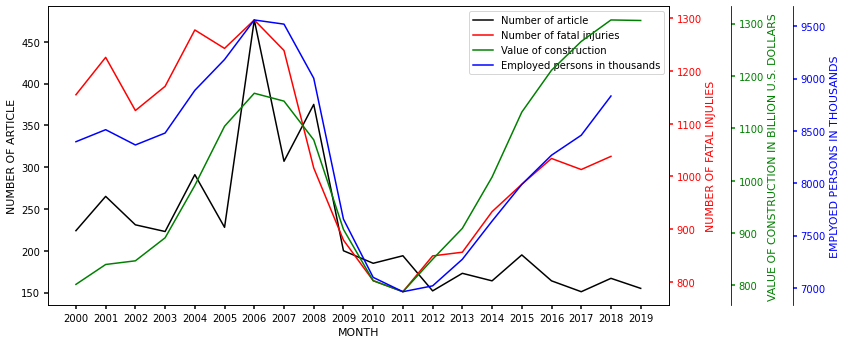

In [812]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, graph = plt.subplots(figsize=(12,5))
#fig.subplots_adjust(right=0.75)

ax1 = graph.twinx()
ax2 = graph.twinx()
ax3 = graph.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines["right"].set_position(("axes", 1.1))
ax3.spines['right'].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(ax2)
make_patch_spines_invisible(ax3)
# Second, show the right spine.
ax2.spines["right"].set_visible(True)
ax3.spines['right'].set_visible(True)

p1, = graph.plot(o_year[:-1], o_freq[:-1], color = "black", label="Number of article")
p2, = ax1.plot(o_year[:-1], true_list, "r-", label="Number of fatal injuries")
p3, = ax2.plot(o_year[:-1], cs_spending, "g-", label="Value of construction")
p4, = ax3.plot(o_year[:-1], number_of_worker ,color = "blue", label = "Employed persons in thousands")



#graph.set_xlim(0, 2)
#graph.set_ylim(0, 2)
#ax1.set_ylim(0, 4)
#ax2.set_ylim(1, 65)
#ax3.set_ylim

graph.set_xlabel("MONTH", fontsize = 11)
graph.set_ylabel("NUMBER OF ARTICLE", fontsize = 11)
ax1.set_ylabel("NUMBER OF FATAL INJULIES", fontsize = 11)
ax2.set_ylabel("VALUE OF CONSTRUCTION IN BILLION U.S. DOLLARS", fontsize = 11)
ax3.set_ylabel('EMPLYOED PERSONS IN THOUSANDS', fontsize = 11)


graph.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)

graph.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax3.tick_params(axis='y', colors = p4.get_color(), **tkw)
graph.tick_params(axis='x', **tkw)

lines = [p1, p2, p3,p4]


graph.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()

plt.savefig('Figure/prediction/year_distribution_comparison_ex1.jpeg', dpi=300)

plt.show()

Distrubution of weather naively

In [417]:
a ={2:1, 3:4}

if 3 in a :
    print(True)

True


In [708]:


def get_dist_weather(df) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            winter_cnt +=1
        else :
            none_cnt +=1
    
    fin_set = {}
    fin_set['Spring(Mar-May)'] = spring_cnt
    fin_set['Summer(Jun-Aug)'] = summer_cnt
    fin_set['Fall(Sep-Nov)'] = fall_cnt
    fin_set['Winter(Dec-Feb)'] = winter_cnt
    fin_set['none'] = none_cnt
    
    return fin_set


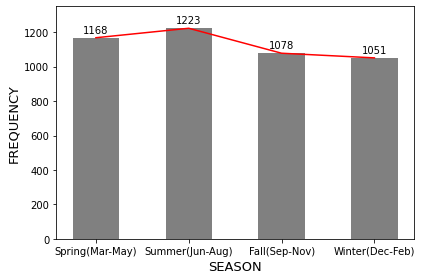

In [813]:
dist_weather = get_dist_weather(df_arrange)


fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_weather.keys())[:-1],list(dist_weather.values())[:-1],width = 0.5, color ='gray')
ax.plot(list(dist_weather.keys())[:-1], list(dist_weather.values())[:-1], color = 'red')
ax.set_ylabel('FREQUENCY', fontsize = 13)
ax.set_xlabel('SEASON', fontsize = 13)
ax.set_ylim(0,1350)


def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect1)        
        
#plt.title("Frequency of keywords")
#plt.title("total construction accident article by weather")
fig.tight_layout()


plt.savefig('Figure/prediction/current/weather_distribution.jpeg', dpi=300)


Distrubution of weather with causation

In [147]:
def get_dist_weather_keyword(df,key) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            if key in df.loc[i,"body"] :
                summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            if key in df.loc[i,"body"] :
                fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            if key in df.loc[i,"body"] :
                winter_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_fire = {}
    fin_set_fire['spring'] = spring_cnt
    fin_set_fire['summer'] = summer_cnt
    fin_set_fire['fall'] = fall_cnt
    fin_set_fire['winter'] = winter_cnt
    fin_set_fire['none'] = none_cnt
    
    return fin_set_fire


In [454]:
get_dist_weather_keyword(df_arrange,"electric")


{'spring': 89, 'summer': 89, 'fall': 76, 'winter': 96, 'none': 0}

In [583]:
def get_dist_month(df) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
       
            jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
        
            feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
        
            mar_cnt +=1
        elif df.loc[i,"month"] =='april' :
   
            apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
     
            may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            
            jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
          
            jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
           
            aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
          
            sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
           
            ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            
            nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            
            dec_cnt +=1
        else :
            none_cnt +=1
    
    fin_set_mon = {}
    fin_set_mon['Jan'] = jan_cnt
    fin_set_mon['Feb'] = feb_cnt
    fin_set_mon['Mar'] = mar_cnt
    fin_set_mon['Apr'] = apr_cnt
    fin_set_mon['May'] = may_cnt
    fin_set_mon['Jun'] = jun_cnt
    fin_set_mon['Jul'] = jul_cnt
    fin_set_mon['Aug'] = aug_cnt
    fin_set_mon['Sep'] = sep_cnt
    fin_set_mon['Oct'] = ocb_cnt
    fin_set_mon['Nov'] = nov_cnt
    fin_set_mon['Dec'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


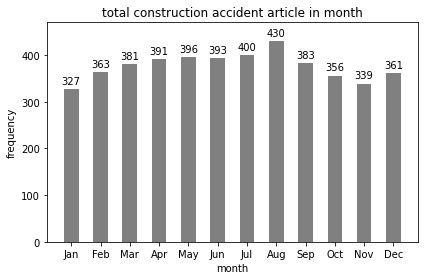

In [585]:
dist_month = get_dist_month(df_arrange)

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month.keys())[:-1],list(dist_month.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,470)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1])
plt.title("total construction accident article in month")
plt.tight_layout()
plt.savefig('Figure/prediction/month_distribution.png')
plt.show()

In [574]:
def get_dist_month_keyword(df,key) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jan_cnt +=1
                else :
                    jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    feb_cnt +=1
                else :
                    feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    mar_cnt +=1
                else :
                    mar_cnt +=1
                
        elif df.loc[i,"month"] =='april' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    apr_cnt +=1
                else :
                    apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    may_cnt +=1
                else :
                    may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jun_cnt +=1
                else :
                    jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jul_cnt +=1
                else :
                    jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    aug_cnt +=1
                else :
                    aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    sep_cnt +=1
                else :
                    sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    ocb_cnt +=1
                else :
                    ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    nov_cnt +=1
                else :
                    nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    dec_cnt +=1
                else :
                    dec_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_mon = {}
    fin_set_mon['Jan'] = jan_cnt
    fin_set_mon['Feb'] = feb_cnt
    fin_set_mon['Mar'] = mar_cnt
    fin_set_mon['Apr'] = apr_cnt
    fin_set_mon['May'] = may_cnt
    fin_set_mon['Jun'] = jun_cnt
    fin_set_mon['Jul'] = jul_cnt
    fin_set_mon['Aug'] = aug_cnt
    fin_set_mon['Sep'] = sep_cnt
    fin_set_mon['Oct'] = ocb_cnt
    fin_set_mon['Nov'] = nov_cnt
    fin_set_mon['Dec'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


In [455]:
get_dist_month_keyword(df_arrange,'electric')

{'january': 33,
 'february': 29,
 'march': 26,
 'april': 35,
 'may': 28,
 'june': 32,
 'july': 25,
 'august': 32,
 'september': 24,
 'octoboer': 20,
 'november': 32,
 'december': 34,
 'none': 0}

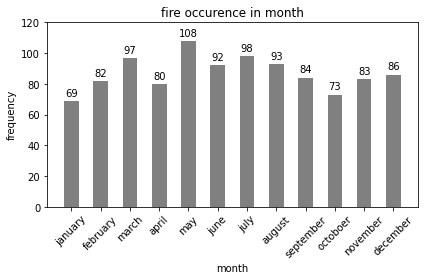

In [211]:
dist_month_fire = get_dist_month_keyword(df_arrange,'fire')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_fire.keys())[:-1],list(dist_month_fire.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,120)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("fire occurence in month")
fig.tight_layout()
plt.savefig('Figure/prediction/month_fire_distribution.png')
plt.show()

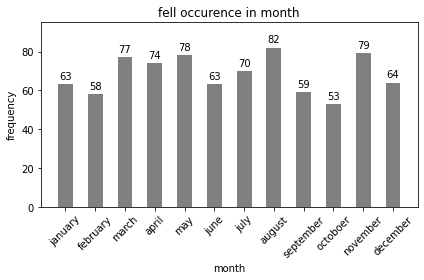

In [198]:
dist_month_fell = get_dist_month_keyword(df_arrange,'fell')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_fell.keys())[:-1],list(dist_month_fell.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,95)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("fell occurence in month")
fig.tight_layout()
plt.savefig('Figure/prediction/month_fell_distribution.png')
plt.show()

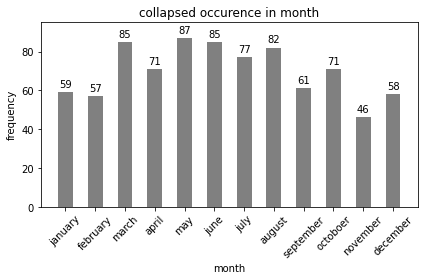

In [413]:
dist_month_collapse = get_dist_month_keyword(df_arrange,'collapsed')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_collapse.keys())[:-1],list(dist_month_collapse.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,95)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("collapsed occurence in month")
fig.tight_layout()
plt.savefig('Figure/prediction/month_collapse_distribution.png')
plt.show()

In [575]:
causation = ['fire','collapsed', 'fell', 'crane','explosion','struck','caught','electrical']

cause_set ={}
for cause in causation :
    set_key = get_dist_month_keyword(df_arrange, cause)
    cause_set[cause]=set_key

In [576]:
extras = ["electrocuted", 'electrocution']

for extra in extras:
    key = get_dist_month_keyword(df_arrange, extra)
    origin =cause_set['electrical']
    #print(key)
    origin = {k: key.get(k,0) + origin.get(k,0) for k in set(key) | set(origin)}

cause_set['electrical'].update(origin)

In [577]:
#update fell + collpased = > fell

key1 = get_dist_month_keyword(df_arrange, 'collapsed')
f_origin = cause_set['fell']
f_origin = {k: key1.get(k,0) + f_origin.get(k,0) for k in set(key1) | set(f_origin)}

cause_set['fell'].update(f_origin)

In [582]:
cause_set

{'fire': {'Jan': 69,
  'Feb': 82,
  'Mar': 97,
  'Apr': 80,
  'May': 108,
  'Jun': 92,
  'Jul': 98,
  'Aug': 93,
  'Sep': 84,
  'Oct': 73,
  'Nov': 83,
  'Dec': 86,
  'none': 0},
 'collapsed': {'Jan': 59,
  'Feb': 57,
  'Mar': 85,
  'Apr': 71,
  'May': 87,
  'Jun': 85,
  'Jul': 77,
  'Aug': 82,
  'Sep': 61,
  'Oct': 71,
  'Nov': 46,
  'Dec': 58,
  'none': 0},
 'fell': {'Jan': 122,
  'Feb': 115,
  'Mar': 162,
  'Apr': 145,
  'May': 165,
  'Jun': 148,
  'Jul': 147,
  'Aug': 164,
  'Sep': 120,
  'Oct': 124,
  'Nov': 125,
  'Dec': 122,
  'none': 0},
 'crane': {'Jan': 17,
  'Feb': 17,
  'Mar': 50,
  'Apr': 40,
  'May': 38,
  'Jun': 43,
  'Jul': 22,
  'Aug': 21,
  'Sep': 22,
  'Oct': 20,
  'Nov': 14,
  'Dec': 13,
  'none': 0},
 'explosion': {'Jan': 17,
  'Feb': 37,
  'Mar': 23,
  'Apr': 32,
  'May': 24,
  'Jun': 26,
  'Jul': 28,
  'Aug': 35,
  'Sep': 29,
  'Oct': 24,
  'Nov': 23,
  'Dec': 29,
  'none': 0},
 'struck': {'Jan': 34,
  'Feb': 45,
  'Mar': 51,
  'Apr': 46,
  'May': 61,
  'Jun': 46

In [553]:
causation

['fire',
 'collapsed',
 'fell',
 'crane',
 'explosion',
 'struck',
 'caught',
 'electrical']

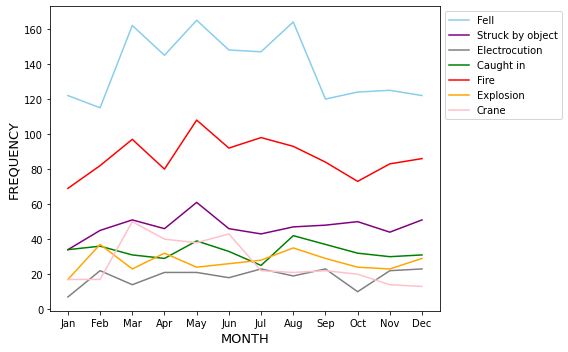

In [806]:



fig, ax = plt.subplots(figsize=(8,5))
#plt.plot(list(cause_set['collapsed'].keys())[:-1], list(cause_set['collapsed'].values())[:-1], color = 'red',label="collapsed")
ax.plot(list(cause_set['fell'].keys())[:-1],list(cause_set['fell'].values())[:-1],color ='skyblue', label ="Fell")
ax.plot(list(cause_set['struck'].keys())[:-1],list(cause_set['struck'].values())[:-1],color ='purple', label ="Struck by object")
ax.plot(list(cause_set['electrical'].keys())[:-1], list(cause_set['electrical'].values())[:-1],color = "gray", label = 'Electrocution')
ax.plot(list(cause_set['caught'].keys())[:-1],list(cause_set['caught'].values())[:-1],color ='green', label ="Caught in")
ax.plot(list(cause_set['fire'].keys())[:-1],list(cause_set['fire'].values())[:-1],color ='red', label = "Fire")
ax.plot(list(cause_set['explosion'].keys())[:-1],list(cause_set['explosion'].values())[:-1],color ='orange', label ="Explosion")
ax.plot(list(cause_set['crane'].keys())[:-1],list(cause_set['crane'].values())[:-1],color ='pink', label ="Crane")




#plt.ylim(0,120)



plt.xlabel("MONTH",fontsize = 13)
plt.ylabel("FREQUENCY", fontsize = 13)
plt.xticks(list(dist_month.keys())[:-1])
#plt.title('causation comparison')
plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.tight_layout()
plt.savefig('Figure/prediction/causation_comparison_by_month.jpeg',dpi=300)

In [331]:
a = [1,2,3]

In [332]:
a[:2]

[1, 2]